# Part I - ( Prosper Loan Data )
## by (Saud Almoter)

## Introduction
> This is the Prosper Loan Data, this data set consists of 81 features and 113,937 record, Loan amount, loan status, lender yiled are some of the attributes of the data set, and many other.<br>
Data dictionary to understand the variables more form this link: https://docs.google.com/spreadsheets/d/1gDyi_L4UvIrLTEC6Wri5nbaMmkGmLQBk-Yx3z0XDEtI/edit#gid=0



## Preliminary Wrangling


In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

## Loading the data and attempting basic exploration action on the original data.

In [32]:
data = pd.read_csv('prosperLoanData.csv')
data.head()

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20


In [33]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   ListingKey                           113937 non-null  object 
 1   ListingNumber                        113937 non-null  int64  
 2   ListingCreationDate                  113937 non-null  object 
 3   CreditGrade                          28953 non-null   object 
 4   Term                                 113937 non-null  int64  
 5   LoanStatus                           113937 non-null  object 
 6   ClosedDate                           55089 non-null   object 
 7   BorrowerAPR                          113912 non-null  float64
 8   BorrowerRate                         113937 non-null  float64
 9   LenderYield                          113937 non-null  float64
 10  EstimatedEffectiveYield              84853 non-null   float64
 11  EstimatedLoss

In [34]:
data.shape

(113937, 81)

In [35]:
sum(data.duplicated())

0

In [36]:
data.isna().sum()

ListingKey                         0
ListingNumber                      0
ListingCreationDate                0
CreditGrade                    84984
Term                               0
                               ...  
PercentFunded                      0
Recommendations                    0
InvestmentFromFriendsCount         0
InvestmentFromFriendsAmount        0
Investors                          0
Length: 81, dtype: int64

## Subset the original dataset, specifing the features that I am interseted in.

In [37]:
sub = ['Term','LoanStatus','IncomeRange','IsBorrowerHomeowner','EmploymentStatus',
'AmountDelinquent','TotalProsperLoans','Occupation','ProsperScore','LenderYield','ClosedDate',
'BorrowerAPR','LoanOriginalAmount','MonthlyLoanPayment','Recommendations','Investors']
print(len(sub))
data.shape
data = data[sub]
data.shape

16


(113937, 16)

In [38]:
data.isna().sum()

Term                       0
LoanStatus                 0
IncomeRange                0
IsBorrowerHomeowner        0
EmploymentStatus        2255
AmountDelinquent        7622
TotalProsperLoans      91852
Occupation              3588
ProsperScore           29084
LenderYield                0
ClosedDate             58848
BorrowerAPR               25
LoanOriginalAmount         0
MonthlyLoanPayment         0
Recommendations            0
Investors                  0
dtype: int64

In [39]:
sum(data.duplicated())

647

In [40]:
data.drop_duplicates(inplace=True)
data.dropna(inplace=True)

In [41]:
print(sum(data.duplicated()))
data.isna().sum()

0


Term                   0
LoanStatus             0
IncomeRange            0
IsBorrowerHomeowner    0
EmploymentStatus       0
AmountDelinquent       0
TotalProsperLoans      0
Occupation             0
ProsperScore           0
LenderYield            0
ClosedDate             0
BorrowerAPR            0
LoanOriginalAmount     0
MonthlyLoanPayment     0
Recommendations        0
Investors              0
dtype: int64

In [42]:
data.head()

,Term,LoanStatus,IncomeRange,IsBorrowerHomeowner,EmploymentStatus,AmountDelinquent,TotalProsperLoans,Occupation,ProsperScore,LenderYield,ClosedDate,BorrowerAPR,LoanOriginalAmount,MonthlyLoanPayment,Recommendations,Investors
33,36,Completed,"$100,000+",False,Employed,0.0,1.0,Other,10.0,0.0685,2012-12-21 00:00:00,0.08191,16000,500.28,0,326
67,12,Completed,"$50,000-74,999",False,Employed,0.0,1.0,Professional,3.0,0.2569,2012-03-26 00:00:00,0.35843,3000,287.60,0,32
77,36,Completed,"$75,000-99,999",True,Full-time,0.0,1.0,Analyst,8.0,0.0999,2012-02-03 00:00:00,0.13109,5600,183.31,0,114
87,36,Completed,"$25,000-49,999",True,Employed,0.0,1.0,Professional,3.0,0.2899,2014-01-23 00:00:00,0.33973,4000,169.78,0,35
100,36,Chargedoff,Not employed,False,Not employed,0.0,1.0,Other,3.0,0.3034,2013-08-30 00:00:00,0.35356,4000,172.76,0,73


### What is the structure of your dataset?

> the dataset contains 16 (from 81) fearture or column and there are 8251(from 113937) record or loan.<br>


### What is/are the main feature(s) of interest in your dataset?

> Features that Iam interested in are Term, Loan Amount and Income Range, I want to know is there any relation between the Income Range and the needs?
Does the Income Range affect the Amount of Delinquent?
who requests more loan house owners or people who rent thier homes?

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> All selected features in the sub list, but the most features I think will support me are Employment status and Monthly loan payment, LenderYield, BorrowerAPR, number of Investors.<br>
I will try to figure out is thier many investors in the real estate field.

## Univariate Exploration



<AxesSubplot:xlabel='ProsperScore', ylabel='count'>

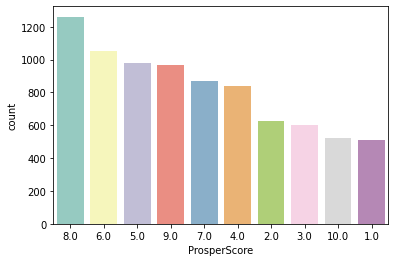

In [43]:
sb.countplot(data=data,x=data.ProsperScore,order=data.ProsperScore.value_counts().index[:-1],palette='Set3')

The chance of a borrower having a 8 prosper score is double the the chance of having 1 or 10 presper score.<br>
Most borrower are in the range 4 - 9 prosper score, which means a low to moderate risk .

<AxesSubplot:xlabel='Term', ylabel='count'>

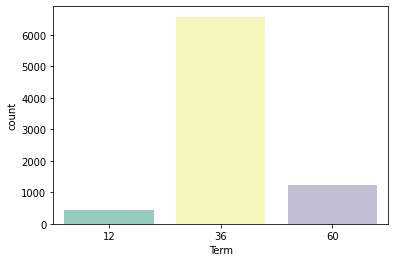

In [44]:
sb.countplot(data = data, x = 'Term',palette="Set3")

Most loan take 36 months to be complete. <br>
And rarely that borrowers ask for 12 month loan.

<AxesSubplot:xlabel='LoanStatus', ylabel='count'>

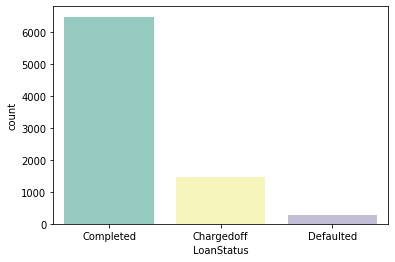

In [45]:
sb.countplot(data=data, x=data.LoanStatus, palette="Set3")

Most loan are completed, I guess its a result of a good checking on the prosper score.

Text(0, 0.5, 'Count')

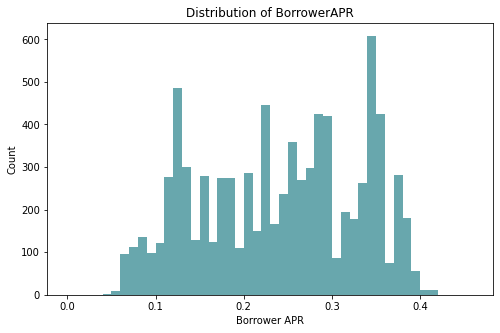

In [46]:
plt.figure(figsize=[8, 5])
bins = np.arange(0, data.BorrowerAPR.max()+0.05, 0.01)
plt.hist(data = data, x = 'BorrowerAPR', bins = bins,color='#68A7AD')
plt.title('Distribution of BorrowerAPR')
plt.xlabel('Borrower APR')
plt.ylabel('Count')


The Borrower APR distribution appears to be bimodal distributed, with a intial spike aroun 0.13 and second spike near to 0.35<br> 
Usually the borrower APR is between 0.1 to 0.4 percent of the loan. <br>


<AxesSubplot:xlabel='count', ylabel='EmploymentStatus'>

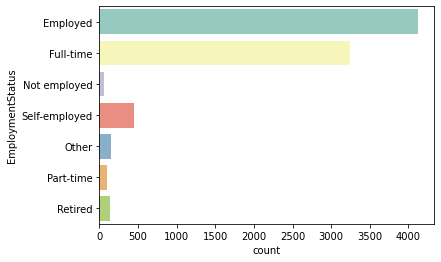

In [47]:
sb.countplot(data=data, y='EmploymentStatus',  palette="Set3")


Most borrower are employed or employed with a full- time jobs.

([<matplotlib.patches.Wedge at 0x2b504c43c70>,
 [Text(-0.04542992656469817, 1.099061473154403, 'True'),
  Text(0.04542992656469828, -1.099061473154403, 'False')],
 [Text(-0.024779959944380817, 0.599488076266038, '51.31%'),
  Text(0.024779959944380876, -0.599488076266038, '48.69%')])

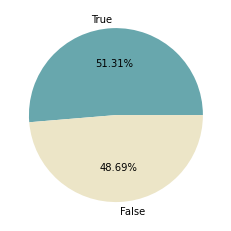

In [48]:
plt.pie(x=data.IsBorrowerHomeowner.value_counts(),
labels=data.IsBorrowerHomeowner.value_counts().index,autopct='%1.2f%%',colors=['#68A7AD','#ECE5C7'])

The percentage of borrower having or owning houses are same with slightly propability that borrower is a house owner.

<AxesSubplot:xlabel='count', ylabel='IncomeRange'>

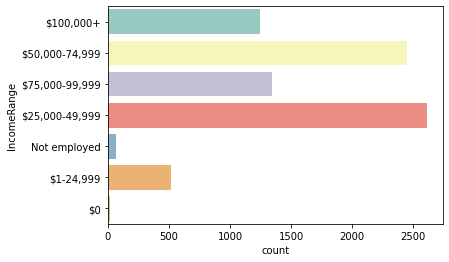

In [49]:
sb.countplot(data= data, y=data.IncomeRange,palette="Set3")

Most borrowers Income range is between 25,000 to 75,000.

In [50]:
data.Investors.describe()

count    8251.000000
mean       88.623924
std        86.022435
min         1.000000
25%        31.000000
50%        62.000000
75%       120.000000
max       899.000000
Name: Investors, dtype: float64

Text(0, 0.5, 'Count')

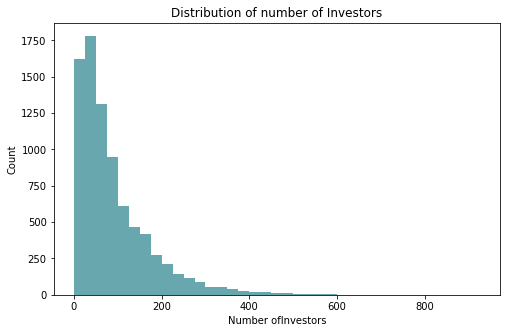

In [51]:
plt.figure(figsize=[8, 5])
bins = np.arange(0, data.Investors.max()+ 50, 25)
plt.hist(data = data, x = 'Investors',bins=bins,color='#68A7AD')
plt.title('Distribution of number of Investors')
plt.xlabel('Number ofInvestors')
plt.ylabel('Count')

Most loan have less than 100 investor.<br>
This is not the optimal way to represent the number of investors per loan.<br>


<AxesSubplot:xlabel='Investors', ylabel='count'>

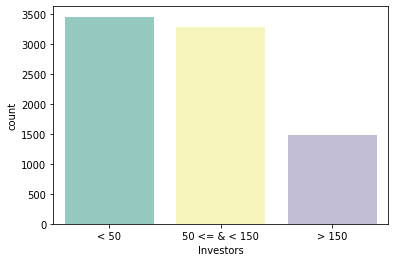

In [52]:
data.Investors = pd.cut(x=data.Investors,bins=[1,50,150,np.infty],
                labels=["< 50","50 <= & < 150","> 150"],include_lowest=True)
sb.countplot(data= data,x=data.Investors,palette="Set3")

This is graph shows that most loan have less than 150 investor per loan.<br>
This graph is easy to interupt compare to the previous graph.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

>   Most of the variables are normal, but I was surprised with precentage of borrower who are house owners, I think this refelect of the number of investors per loan, I think the other half of borrower who aren't house owner were lent by fewer investor.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> In the first graph that shows the number of investors it was right sweked since there was a outliner, A loan with 899 investor, so to answer my question I just need to categorized it, I found the Quartiles using data.describe() and based on it I categorized to three groups.<br> 
Then I plot it again. 

## Bivariate Exploration

<AxesSubplot:xlabel='Term', ylabel='count'>

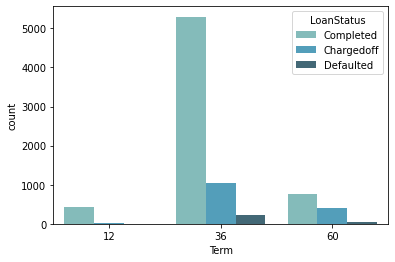

In [53]:
sb.countplot(data= data, x= data.Term , hue=data.LoanStatus,palette='GnBu_d')

Most loan terms are 36 month as shown previously, and there isn't any relation between the term of a loan and the status, all terms are most likly completed.

<AxesSubplot:xlabel='AmountDelinquent', ylabel='LoanOriginalAmount'>

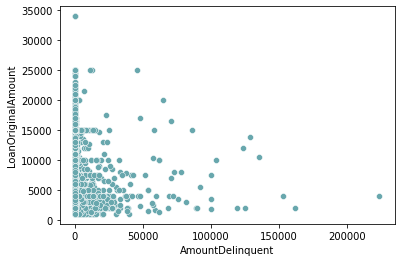

In [54]:
sb.scatterplot(data= data, x=data.AmountDelinquent, y=data.LoanOriginalAmount,color='#68A7AD')

Loan amount delinquent has no relation with the loan amount, we can see many instances with high loan amount and zero amount delinquent.

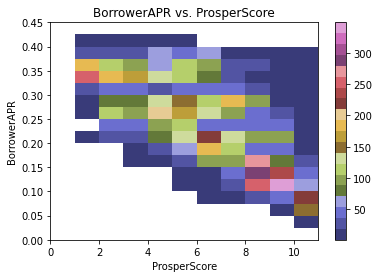

In [55]:
bins_y = np.arange(0, data['BorrowerAPR'].max()+0.05, 0.025)
bins_x = np.arange(0, data['ProsperScore'].max()+1, 1)
plt.hist2d(data = data, x = data.ProsperScore,y = data.BorrowerAPR, bins = [bins_x, bins_y], 
               cmap =  'tab20b', cmin = 0.5)
plt.colorbar()
plt.title('BorrowerAPR vs. ProsperScore')
plt.xlabel('ProsperScore')
plt.ylabel('BorrowerAPR');

There is an opposite relation between borrower ARp and prosper score, borrowers with lower risk have lower anual percentage rate.

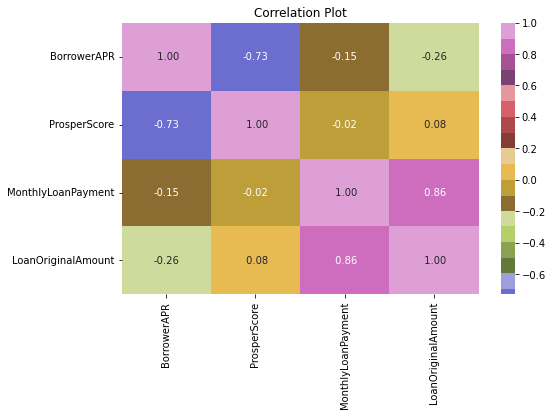

In [56]:
num_vars = ['BorrowerAPR', 'ProsperScore', 'MonthlyLoanPayment','LoanOriginalAmount','Investors']

plt.figure(figsize = [8, 5])
sb.heatmap(data[num_vars].corr(), annot = True, fmt = ' .2f',
           cmap =  'tab20b', center = 0)
plt.title('Correlation Plot') 
plt.show()

The loan oringinal amount and the monthly loan payment have a strong positive relation and it was expected.<br>
The Borrower APR and the prosper score have a strong negative relation.<br>
There are there more negative relations but they aren't strong between the loan oringinal amount and borrower APR,<br>
monthly loan payment and borrower APR, and prosper score and monthly loan payment.<br>
And a single week positive relation between loan original amount and prosper score.


<AxesSubplot:xlabel='LenderYield', ylabel='IncomeRange'>

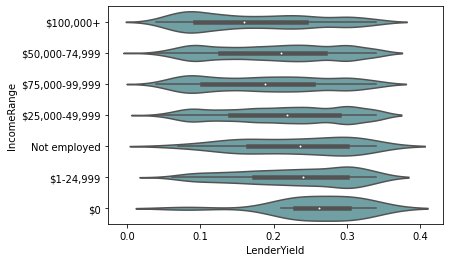

In [57]:
sb.violinplot(data = data, y = data.IncomeRange, x = data.LenderYield, color = '#68A7AD')

There is an negative relation between the lender yield and income range, the higher the income is the less lender yield.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> The borrower APR has a negative relation with the prosper score and,loan oringinal amount, monthly loan payment.<br>
And I was suprised that there aren't any relation between the amount delinquent and the loan amount.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> There is a weird relation between the lender yield and income range, I think that lenders should ask for a yield based on the term and borrower APR, instead of the income range of the borrower. 

## Multivariate Exploration

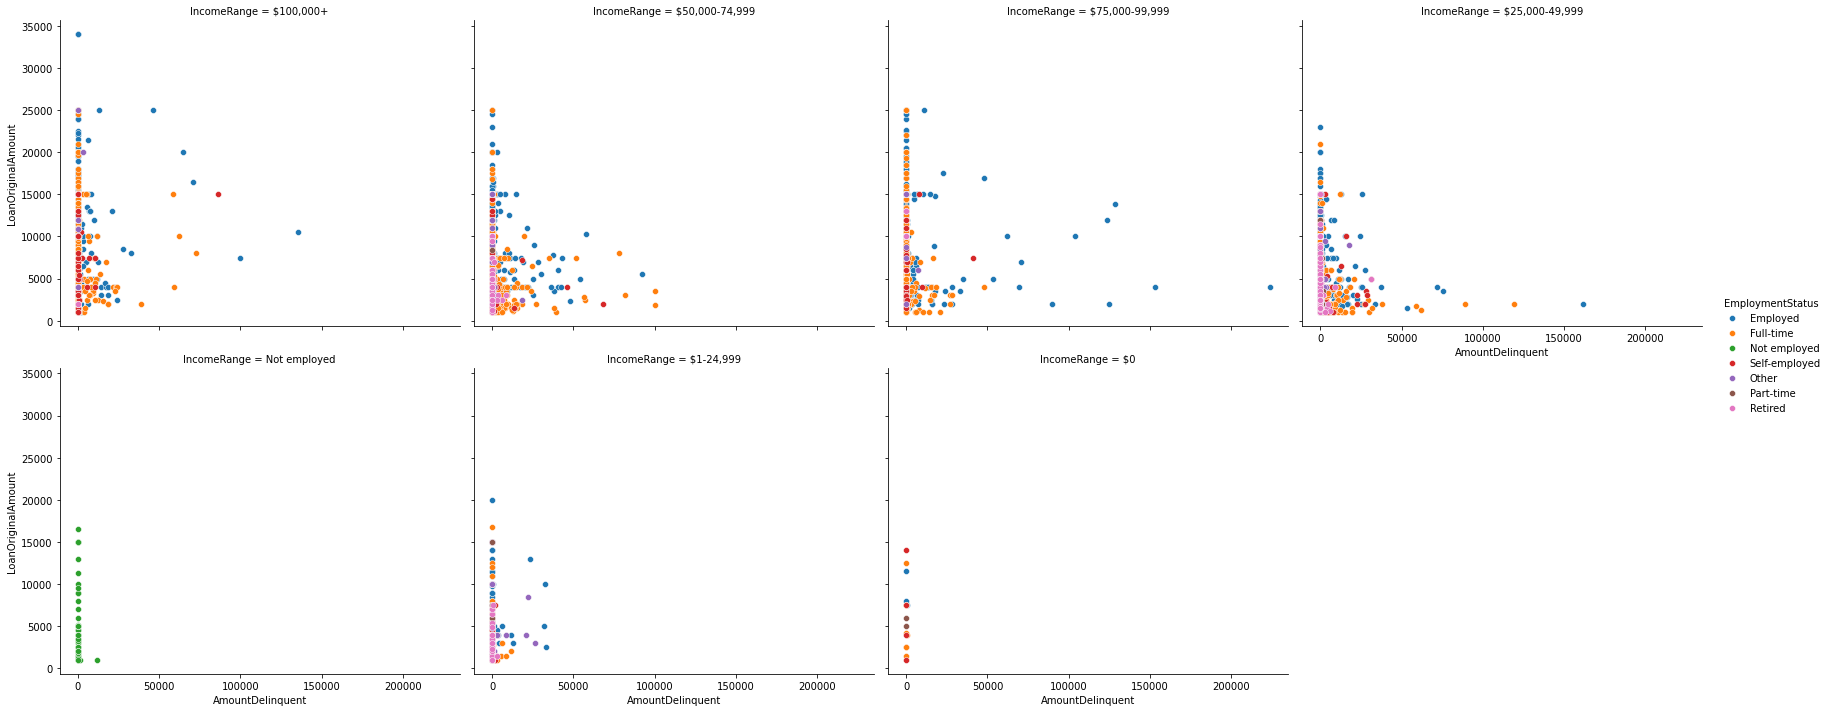

In [58]:
g=sb.FacetGrid(data=data, aspect=1.2, height=5, hue='EmploymentStatus',col='IncomeRange', col_wrap=4)
g.map(sb.scatterplot, 'AmountDelinquent','LoanOriginalAmount')
g.add_legend()

The above graphs conbine four features Income range, loan original amount, amount delinquent, and employment status.<br>
We observed that all borrowers that income range is zero don't have amount delinquent.<br>
And employed and full time employeed borrowers are the most borrowers that have amount delinquent.<br>

<AxesSubplot:xlabel='Term', ylabel='LenderYield'>

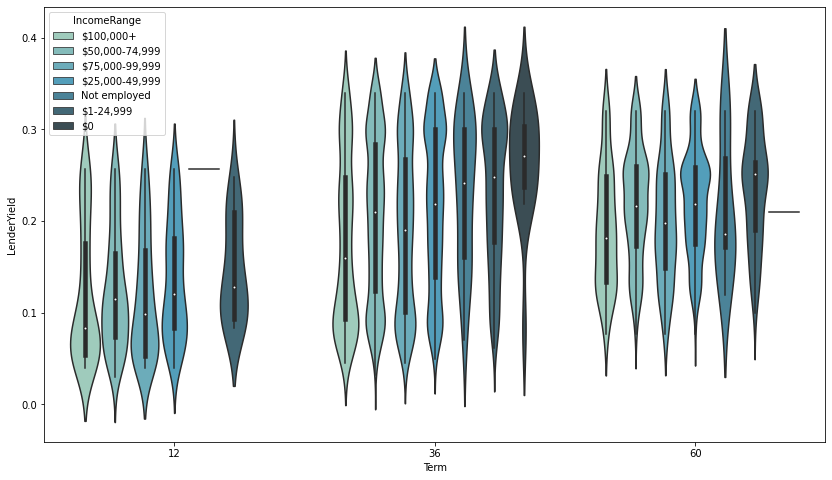

In [59]:
plt.figure(figsize=[14,8])
sb.violinplot(data = data, x = 'Term', y = 'LenderYield', hue = 'IncomeRange', palette='GnBu_d')

In this visual we have the term with the incoume range and lender yield.<br>
We want to see do lender ask for more yeild for borrowers with lower income range?<br>
And from the figure we can say that lenders take less yield form borrowers with hight income regardless the term of the loan.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> I find that the most borrowers with high amount delinquent are employeed or full-time employeed, and there isn't any relation between the loan amount and the amount delinquent.<br>

### Were there any interesting or surprising interactions between features?

> No, in the second multivariate I checked what I said in the second question of the bivariate section, that lender take higher yield when the borrowers income range is low.

## Conclusions
>At the end of this exploration phase I will talk about the flow from start till the end, after loading the data I mase some quick exploration task on the original data, then I select the features I want to work on, after filtring the features I checked if there are null values of duplicated records then remove them, then I started the univariate exploration on the supset data, I foucsed on the distribution of the variables, I also made some changes on the Investors column I changed it from numeric to catogarized column, then I start bivariate section which I focused on the relationships then the multivarite which was answering my qustions.<br>
And these are my findings:<br>
First when I started this exploration I thought that most borrowers don't own homes or houses and I was totally wronge more than 50% of borrowers have houses.<br>
Then I thougth that most amount delinquent are from borrowers with low income range but, I found that the income range doesn't havea relation with the amount delinqunet.<br>
I thought that lenders only takes yields regarding the term, prosper scorse, loan amount ,but I was supraized that the lenders take more yield from borrowers with lower income range regardless of other features.




> At the end of your report, make sure that you export the notebook as an
html file from the `File > Download as... > HTML or PDF` menu. Make sure you keep
track of where the exported file goes, so you can put it in the same folder
as this notebook for project submission. Also, make sure you remove all of
the quote-formatted guide notes like this one before you finish your report!

